# Itération 1

## Load the data
Extraire l’ensemble des lignes (rows) et stocker ces informations dans une variable de type List 

In [2]:
import csv
data = []
with open('./data/trees.csv', newline='') as csvfile:
    treereader = csv.reader(csvfile, delimiter=',')
    data = list(treereader)

## Select parts of the data

### Selectionner les deux premières lignes de ce csv. Que représentent elles ?

In [4]:
data[0]

['\ufeffELEM_POINT_ID',
 'CODE',
 'NOM',
 'GENRE',
 'GENRE_DESC',
 'CATEGORIE',
 'CATEGORIE_DESC',
 'SOUS_CATEGORIE',
 'SOUS_CATEGORIE_DESC',
 'CODE_PARENT',
 'CODE_PARENT_DESC',
 'ADR_SECTEUR',
 'BIEN_REFERENCE',
 'GENRE_BOTA',
 'ESPECE',
 'VARIETE',
 'STADEDEDEVELOPPEMENT',
 'EQUIPE',
 'REMARQUES',
 'ANNEEDEPLANTATION',
 'RAISONDEPLANTATION',
 'TRAITEMENTCHENILLES',
 'COURRIER',
 'IDENTIFIANTPLU',
 'TYPEIMPLANTATIONPLU',
 'INTITULEPROTECTIONPLU',
 'ANNEEABATTAGE',
 'ESSOUCHEMENT',
 'DIAMETREARBRE',
 'CAUSEABATTAGE',
 'COLLECTIVITE',
 'GeoJSON']

In [5]:
data[1]

['37993',
 'ESP37969',
 'ESP37969',
 'VEG',
 'VEGETATION',
 'ESP01',
 'Arbre',
 'ESP065',
 "Arbre d'enceintes fermées",
 'ESP37898',
 'Maison des Collines Jard Poisat',
 '6',
 'AR37969',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '{"type":"Point","coordinates":[5.76034690089422,45.1543159441061]}']

### Afficher la 2ème colonne de chacune de ces deux lignes. 

In [6]:
data[0][1]

'CODE'

In [7]:
data[1][1]

'ESP37969'

### Extraire l’information concernant l’année de plantation pour l’ensemble des lignes (rows) et stocker ces informations dans une autre variable de type List
Vous pouvez essayer avec une boucle for : https://www.w3schools.com/python/python_for_loops.asp 

In [8]:
# Boucle for 
annees_plantation = []
for row in data:
    annees_plantation.append(row[19])
    
# List comprehension
annees_plantation = [row[19] for row in data]

### Afficher les 50 premières lignes et les 50 dernières lignes de cette liste.

In [29]:
annees_plantation[:15]

['ANNEEDEPLANTATION',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '2017']

In [30]:
annees_plantation[-15:]

['2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001',
 '2001']

## Counting the data

### Combien d’arbres sont recensés dans ce jeu de données ?


In [31]:
nombre_arbres = len(data) - 1  # On enlève le header

### Pour combien d’arbres manque-t-il l’information concernant la date de plantation ? (Vous pouvez essayer de le faire d’au moins deux manières différentes.)

In [28]:
# Méthode 1
annees_plantation.count('')

#Methode 2
nombre = 0
for annee in annees_plantation:
    if annee == '':
        nombre += 1
        
# Méthode 3
liste_annees_manquantes = [annee for annee in annees_plantation if annee == '']
nombre =  len(liste_annees_manquantes)

# Méthode 4
liste_annees_manquantes = map(lambda annee: len(annee) == 0, annees_plantation)
nombre = sum(liste_annees_manquantes)

# Methode 5
liste_annees_manquantes = list(filter(lambda annee: len(annee) == 0, annees_plantation))
nombre = len(liste_annees_manquantes)


# Methode 6 (plus exotique)
from functools import reduce
reduce(
    lambda acc, val: acc + 1 if len(val) == 0 else acc,
    annees_plantation,
    0)

442

### Combien d’arbres ont été plantés l’année de votre naissance ? 


In [11]:
annees_plantation.count('1987')

771

### Quelle est la plus ancienne année de plantation recensée dans ce dataset ? La plus récente ?    

In [47]:
# Méhode 1 (année min)
annees_recensees = []
for annee in annees_plantation:
    if annee.isdigit():
        annees_recensees.append(int(annee))
        
min(annees_recensees)


# Méthode 2 (année min)
annees_recensees = [int(annee) for annee in annees_plantation if annee.isdigit()]
min(annees_recensees)


# Méthode 3 (bricolage)
annees_recensees = [int(annee or 2025) for annee in annees_plantation[1:] ]
min(annees_recensees)

1950

In [48]:
# Attention !!! 
# String int comparés en ordre alphabétique 
# D'où l'utilité du typage int

'1950' > '19400'

True

### Combien d’arbres ont été plantés année par année (ex : 1987 : 771, 1988 : 266, etc…) ?

In [50]:
yearly_count = []
for annee in range(1950, 2021):
    yearly_count.append(annees_recensees.count(annee))
    
yearly_count[:5]

[422, 0, 0, 0, 0]

### Combien d’arbres ont été plantés en moyenne chaque année ?   


In [52]:
# Méthode 1
from statistics import mean
mean(yearly_count)

# Méthode 2
moyenne_annuelle = sum(yearly_count)/len(yearly_count)

## Manipulate data structures

### Tuples (annee, nombre arbres plantes)
Stocker conjointement l’année de plantation et le nombre d’arbres plantés dans un tuple. \
Les tuples seront stockés dans une liste (ex : [ (‘1987’, 771), (‘1988’, 266), ….. ] )

#### Methode 1 : boucle

In [54]:
number_of_trees_per_year = []
for annee in range(1950, 2021):
    number_of_trees_per_year.append((annee, annees_recensees.count(annee)))
    
number_of_trees_per_year[:5]

[(1950, 422), (1951, 0), (1952, 0), (1953, 0), (1954, 0)]

#### Methode 2 : methode count et comprehension de liste

In [99]:
number_of_trees_per_year = [ (annee, annees_recensees.count(annee)) for annee in range(1950,2021) ]

#### Methode 3 : avec zip et comprehension de list

In [100]:
# Methode 3
number_of_trees_per_year = [ 
                            (annee, num) 
                            for annee, num 
                            in zip(range(1950,2021), yearly_count) 
]

### Quel Maire a planté le plus d’arbres à Grenoble ?

In [101]:
max(
    number_of_trees_per_year, 
    key=lambda annee_tuple: annee_tuple[1]
)
# Résultat --> 1975 --> Hubert Dubedout 

(1975, 3922)

### Création de tuples (annee, genre botanique)
Récupérez maintenant l’information concernant le genre botanique et la stocker conjointement avec l’année de plantation dans un tuple. Les tuples seront stockés dans une liste (ex : [ (‘1987’, ‘Acer), (‘1988’, ‘Acerifolia), ….. ] )


In [102]:
annee_genreBota = [(row[19], row[13]) for row in data] 
annee_genreBota[:5]

[('ANNEEDEPLANTATION', 'GENRE_BOTA'), ('', ''), ('', ''), ('', ''), ('', '')]

### Pour combien d'arbres manque-t-il l’information concernant le genre botanique ?

#### Methode 1 : boucle

In [103]:
# Méthode 1 
missing = 0
for row in annee_genreBota:
    if row[1] == '':
        missing += 1

#### Methode 2 : comprehension

In [104]:
# Méthode 2 
sum([1 for row in annee_genreBota if row[1] == ''])

515

#### Methode 3 : filter

In [105]:
# Méthode 3
len(list(filter(lambda row: row[1] == '', annee_genreBota)))

515

## Display the data

### Utilisez Matplotlib pour tracer l’histogramme représentant le nombre d’arbres plantés par année.

#### Methode 1 : line plot

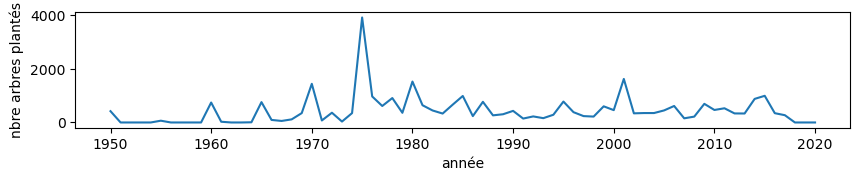

In [106]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1.5))

plt.plot(range(1950, 2021), yearly_count)
plt.xlabel('année')
plt.ylabel('nbre arbres plantés')
plt.show()

#### Methode 2 : stem plot

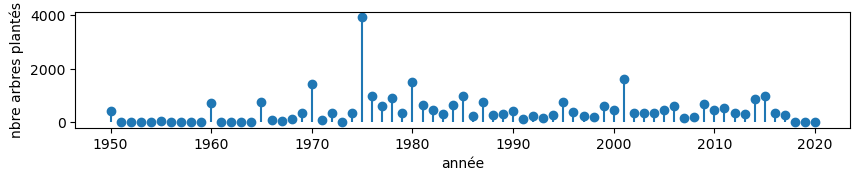

In [107]:
plt.figure(figsize=(10,1.5))
plt.stem(range(1950, 2021), yearly_count, basefmt=" ")
plt.xlabel('année')
plt.ylabel('nbre arbres plantés')
plt.show()

#### Methode 3 : bar plot

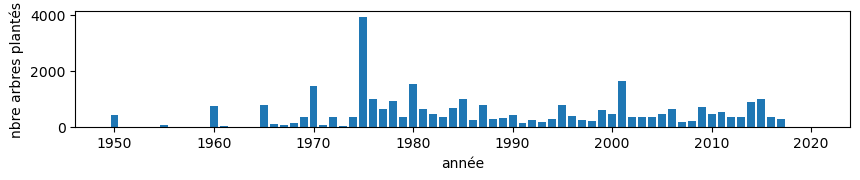

In [108]:
plt.figure(figsize=(10,1.5))
plt.bar(range(1950, 2021), yearly_count)
plt.xlabel('année')
plt.ylabel('nbre arbres plantés')
plt.show()

## Sort the data 
[ plus dur ] Triez les tuples en fonction de l’année de plantation par ordre décroissant.

In [110]:
annee_genreBota_clean = [(int(row[19]), row[13]) for row in data if row[19].isdigit()] 
liste_triee = sorted(annee_genreBota_clean, key=lambda t:t[0], reverse=True)

# Itération 2 

## Genre uniques
Pour commencer, identifiez tous les genres botaniques représentés à Grenoble.  Essayez plusieurs manières de résoudre ce problème.  

### Structure de données :  set

In [111]:
genre_bota = [row[13] for row in data[1:] if row[13] != '']

# Méthode 1 
genre_bota_uniques = set()
for genre in genre_bota:
    genre_bota_uniques.add(genre)

# Méthode 2
genre_bota_uniques = set([row[13] for row in data[1:] if row[13] != ''])

### Combien y en a-t-il ? 

In [112]:
# Combien y en a-t-il ? 
len(genre_bota_uniques)

112

## Especes différentes
Identifiez maintenant toutes les espèces différentes présentes à Grenoble. N’oubliez pas que les espèces sont une sous catégorie de genre botanique ! (l’espèce est ‘Platanus Acerifolia’ et pas uniquement ‘Acerifolia’) 

In [113]:
especes = [' '.join(row[13:15]) for row in data if row[13] != '' and row[14] != '']
especes_uniques = set(especes)

### En utilisant la structure de données Dict compter le nombre de représentants de chaque genre botanique

#### Methode 1 : boucle

In [114]:
genre_bota_dict = {}
for genre in genre_bota_uniques:
    genre_bota_dict[genre] = genre_bota.count(genre)

#### Methode 2 : Counter

In [115]:
from collections import Counter
cnt = Counter()
for genre in genre_bota:
    cnt[genre] += 1

#### Methode 3 : comprehension de dictionnaire

In [136]:
genre_bota_dict = {genre:genre_bota.count(genre) for genre in genre_bota_uniques}

### Quel est le genre botanique le plus représenté ?

#### Methode 1

In [121]:
# Genre botanique le plus représenté
genre_bota_leader = max(genre_bota_dict.items(), key=lambda x: x[1])
genre_bota_leader

('Acer', 5276)

#### Methode 2

In [120]:
espece = max(genre_bota_dict, key=genre_bota_dict.get)
nombre = genre_bota_dict[espece]

### Listez tous les représentants uniques de leurs genre botanique  

In [31]:
arbres_uniques = [t for t in genre_bota_dict.items() if t[1] == 1 ]
arbres_uniques

[('Nyssa', 1),
 ('Poncinos', 1),
 ('Castanea', 1),
 ('Sequoia', 1),
 ('Staphylea', 1),
 ('Rhamnus', 1),
 ('Sciadopitys', 1),
 ('Eucalyptus', 1),
 ('Sterculia', 1),
 ('Sorbopyrus', 1)]

### Classer tous les genres botaniques en fonction de leur nombre (ordre décroissant) 

In [122]:
# Tri des genres bota les plus représentés
sorted_list = sorted(genre_bota_dict.items(), key=lambda x: x[1], reverse=True)
sorted_list[:5]

[('Acer', 5276),
 ('Platanus', 4663),
 ('Pinus', 2118),
 ('Tilia', 1770),
 ('Fraxinus', 1506)]

### Quelle est la proportion du genre botanique le plus représenté parmi tous les genres ? 


In [124]:
proportion = genre_bota_leader[1] / len(genre_bota) * 100
proportion

17.17000781046602

### Quelle est la proportion de chacun des genres botaniques par rapport au total ? 


In [133]:
genre_bota_dict_props = {genre : {
                                 'nb': genre_bota.count(genre), 
                                 'props':  genre_bota.count(genre) / len(genre_bota) * 100
                             } 
                         for genre in genre_bota_uniques} 

list(genre_bota_dict_props.items())[:3]

[('Phillyrea', {'nb': 3, 'props': 0.009763082530590992}),
 ('Cedrela', {'nb': 46, 'props': 0.14970059880239522}),
 ('Broussonetia', {'nb': 23, 'props': 0.07485029940119761})]

## Idem précédemment mais en comptant les espèces. 

### Création du dictionnaire

#### Methode 1 : boucle

In [35]:
# Méthode 1
especes_dict = {}
for espece in especes_uniques:
    especes_dict[espece] = especes.count(espece)

#### Methode 2 : Counter

In [35]:
# Méthode 2 
from collections import Counter
cnt = Counter()
for espece in especes:
    cnt[espece] += 1

#### Methode 3 : Comprehension de dictionnaire

In [134]:
# Méthode 3
especes_dict = {espece:especes.count(espece) for espece in especes_uniques}

### Espèce la plus représentée

In [135]:
# Espèce la plus représentée
espece_leader = max(especes_dict.items(), key=lambda x: x[1])
espece_leader

('Platanus acerifolia', 4422)

### Espèces uniques ?

In [140]:
arbres_uniques_especes = [t for t in especes_dict.items() if t[1] == 1 ]
arbres_uniques_especes[:5]

[('Cedrus sinensis', 1),
 ('Rhus thyphina', 1),
 ('Chamaecyparis nooktensis', 1),
 ('Chamaecyparis pisifera', 1),
 ('GENRE_BOTA ESPECE', 1)]

###  Classer tous les genres botaniques en fonction de leur nombre (ordre décroissant)


In [139]:
# Tri des espèces les plus représentés
sorted_list_especes = sorted(especes_dict.items(), key=lambda x: x[1], reverse=True)
sorted_list_especes[:5]

[('Platanus acerifolia', 4422),
 ('Acer pseudoplatanus', 1347),
 ('Pinus nigra', 1304),
 ('Carpinus betulus', 1282),
 ('Acer platanoides', 1130)]

### Quelle est la proportion de l'espèce la plus représentée parmi tous les espèces ? 

In [39]:
proportion = espece_leader[1] / len(especes) * 100
proportion

15.21993529290287

### Quelle est la proportion de chacun des genres botaniques par rapport au total ? 

In [40]:
espece_dict_props = {espece : 
                             {
                                 'nb': especes.count(espece), 
                                 'props':  especes.count(espece) / len(especes) * 100
                             } 
                             for espece in especes_uniques} 
espece_dict_props

{'Sequoia sempervirens': {'nb': 1, 'props': 0.0034418668685895232},
 'GENRE_BOTA ESPECE': {'nb': 1, 'props': 0.0034418668685895232},
 'Magnolia hybride': {'nb': 3, 'props': 0.010325600605768568},
 'Sequoiadendron sempervirens': {'nb': 6, 'props': 0.020651201211537136},
 'Quercus suber': {'nb': 17, 'props': 0.05851173676602189},
 'Amélanchier canadensis': {'nb': 70, 'props': 0.24093068080126662},
 'Prunus incisa': {'nb': 1, 'props': 0.0034418668685895232},
 'Quercus robur': {'nb': 95, 'props': 0.3269773525160047},
 'Prunus yedoensis': {'nb': 12, 'props': 0.04130240242307427},
 'Prunus serrulata': {'nb': 425, 'props': 1.4627934191505474},
 'Acer monspessulanum': {'nb': 76, 'props': 0.26158188201280375},
 'Quercus ilex': {'nb': 13, 'props': 0.0447442692916638},
 'Prunus cerasifera': {'nb': 112, 'props': 0.3854890892820266},
 'Magnolia liliflora': {'nb': 1, 'props': 0.0034418668685895232},
 'Platanus acerifolia': {'nb': 4422, 'props': 15.21993529290287},
 'Ulmus parvifolia': {'nb': 1, 'pro

### Evolution au cours du temps
(plus dur) Comment la pratique de plantation a-t-elle évolué au cours du temps ? Diversifie-t-on plus maintenant qu’avant ? Vos analyses sont-elles en accord avec le communiqué de presse ? 

In [141]:
# Nombre d'espèces par an 
data_espece_year = [(' '.join(row[13:15]), row[19]) 
                        for row in data[1:]
                        if row[13] != '' and row[14] != '']

nb_espece_year = {year: len(set([' '.join(row[13:15]) 
                            for row in data[1:]
                            if row[13] != '' 
                            and row[14] != ''
                            and row[19] == str(year)]))
                      for year in range(1950, 2022)}

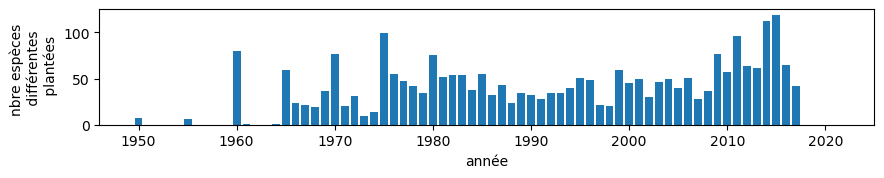

In [147]:
plt.figure(figsize=(10,1.5))
plt.bar(range(1950, 2022), nb_espece_year.values())
plt.xlabel('année')
plt.ylabel('nbre espèces \n différentes \n plantées')
plt.show()

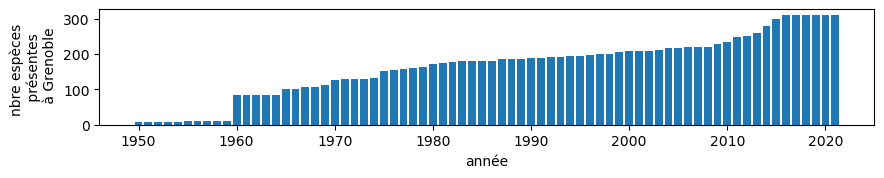

In [153]:
# Nombre d'espèces par an 
nb_espece_presentes = {year: len(set([' '.join(row[13:15]) 
                            for row in data[1:]
                            if row[13] != '' 
                            and row[14] != ''
                            and row[19] <= str(year)]))
                      for year in range(1950, 2022)}

plt.figure(figsize=(10,1.5))
plt.bar(range(1950, 2022), nb_espece_presentes.values())
plt.xlabel('année')
plt.ylabel('nbre espèces \n présentes \n à Grenoble')
plt.show()